In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
from mmcv.utils import collect_env

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [3]:
import mmrotate
from mmrotate.datasets.builder import ROTATED_DATASETS
from mmrotate.datasets.dota import DOTADataset
print(mmrotate.__version__)

0.3.4


In [4]:
# Test mmrotate installation
!mim download mmrotate --config oriented_rcnn_r50_fpn_1x_dota_le90 --dest .

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing oriented_rcnn_r50_fpn_1x_dota_le90...
oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth exists in /gpfs/home/weitzk01
Successfully dumped oriented_rcnn_r50_fpn_1x_dota_le90.py to /gpfs/home/weitzk01


In [5]:
# Check MMDetection installation
import mmdet
print(mmdet.__version__)

2.28.2


In [6]:
# Check mmcv installation
import mmcv
from mmcv import Config
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

10.2
GCC 7.3


In [7]:
import torch
print(torch.__version__)

1.8.0


In [8]:
from mmcv.utils import collect_env
collect_env()

/bin/sh: gcc: command not found


{'sys.platform': 'linux',
 'Python': '3.8.13 (default, Mar 28 2022, 11:38:47) [GCC 7.5.0]',
 'CUDA available': True,
 'GPU 0': 'Tesla V100-SXM2-16GB',
 'CUDA_HOME': '/gpfs/share/apps/cuda/10.1.105',
 'NVCC': 'Cuda compilation tools, release 10.1, V10.1.10',
 'GCC': 'n/a',
 'PyTorch': '1.8.0',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v1.7.0 (Git Hash 7aed236906b1f7a05c0917e5257a1af05e9ff683)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 10.2\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37,code=compute_37\n  - CuDNN 

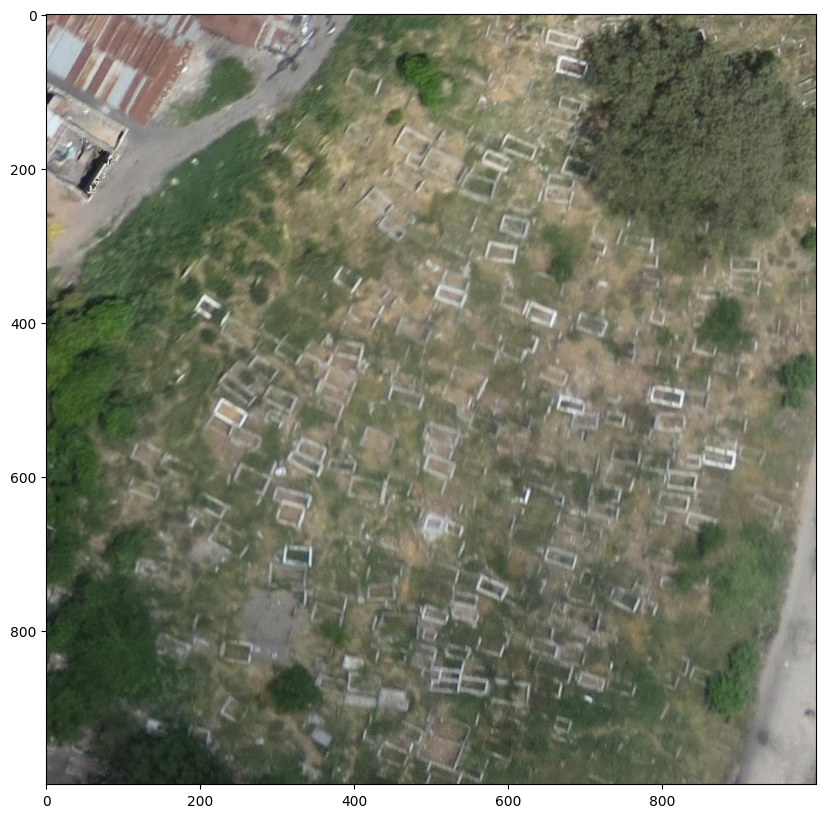

In [9]:
# Let's take a look at the dataset image
img = mmcv.imread('/gpfs/home/weitzk01/drone_data/images/DAR_UNLABLED_4_SatelliteImagery_drone_556f7a49ac00a903002fb01e.tif_0_0.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [10]:
# Read in dataset labels as a dataframe
import pandas as pd
img_labels = pd.read_csv('/gpfs/home/weitzk01/drone_data/train/DAR_UNLABLED_4_SatelliteImagery_drone_556f7a49ac00a903002fb01e.tif_0_0.txt',
            sep=' ',
            names=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'label', 'difficulty'])
img_labels.head()

x1     y1     x2     y2     x3     y3     x4     y4  label  difficulty
0  652.9   17.7  648.9   32.4  690.2   47.1  694.2   31.1  grave           0
1  664.6   54.3  660.6   68.9  701.9   83.6  705.9   67.6  grave           0
2  395.3   74.3  391.3   88.9  432.6  103.6  436.6   87.6  grave           0
3  660.6  102.3  656.6  116.9  697.9  131.6  701.9  115.6  grave           0
4  597.9  159.6  593.9  174.3  635.3  188.9  639.3  172.9  grave           0

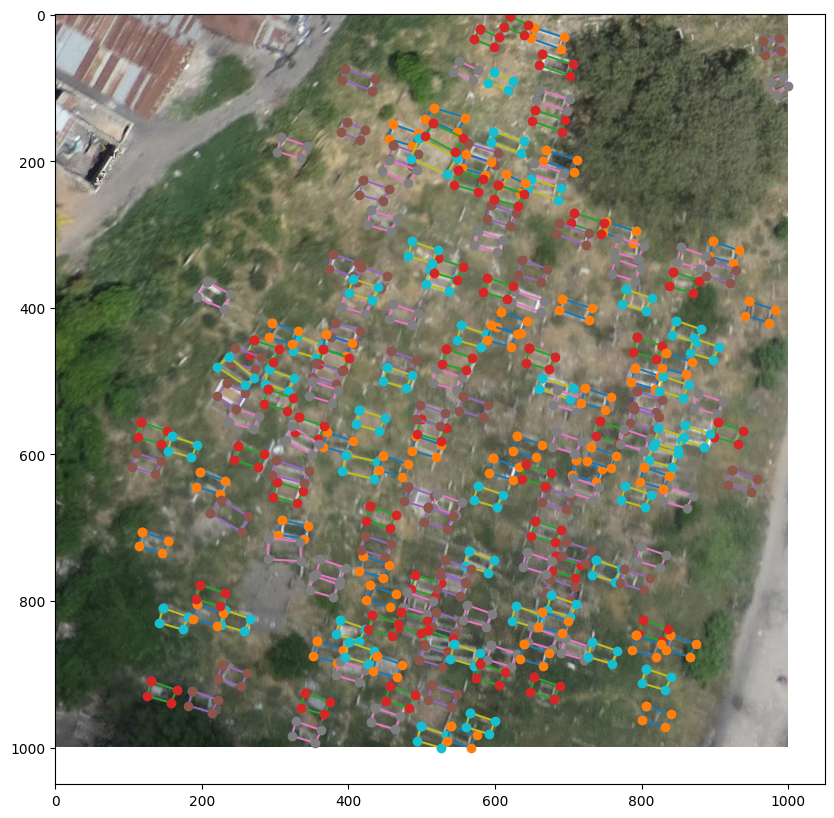

In [11]:
# Let's take a look at the dataset image with overlayed labels
img = mmcv.imread('/gpfs/home/weitzk01/drone_data/images/DAR_UNLABLED_4_SatelliteImagery_drone_556f7a49ac00a903002fb01e.tif_0_0.png')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
for index, row in img_labels.iterrows():
    x = row[['x1', 'x2', 'x3', 'x4', 'x1']]
    y = row[['y1', 'y2', 'y3', 'y4', 'y1']]
    plt.plot(x, y, '-')
    plt.plot(x, y, 'o')
plt.show()

In [12]:
@ROTATED_DATASETS.register_module()
class DroneDataset(DOTADataset):
    """Grave dataset for detection."""
    CLASSES = ('grave',)

In [13]:
# We use mim to download the pre-trained checkpoints for inference and finetuning.
!mim download mmrotate --config oriented_rcnn_r50_fpn_1x_dota_le90 --dest .

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing oriented_rcnn_r50_fpn_1x_dota_le90...
oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth exists in /gpfs/home/weitzk01
Successfully dumped oriented_rcnn_r50_fpn_1x_dota_le90.py to /gpfs/home/weitzk01


In [14]:
from mmcv import Config
cfg = Config.fromfile('oriented_rcnn_r50_fpn_1x_dota_le90.py')

In [15]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'DroneDataset'
cfg.data_root = '/gpfs/home/weitzk01/drone_data'

cfg.data.test.type = 'DroneDataset'
cfg.data.test.data_root = '/gpfs/home/weitzk01/drone_data'
cfg.data.test.ann_file = 'val'
cfg.data.test.img_prefix = 'images'

cfg.data.train.type = 'DroneDataset'
cfg.data.train.data_root = '/gpfs/home/weitzk01/drone_data'
cfg.data.train.ann_file = 'train'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'DroneDataset'
cfg.data.val.data_root = '/gpfs/home/weitzk01/drone_data'
cfg.data.val.ann_file = 'val'
cfg.data.val.img_prefix = 'images'

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 1
# We can still use the pre-trained Mask RCNN model
cfg.load_from = 'oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth'

# Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

cfg.optimizer.lr = 0.001
cfg.lr_config.warmup = None
cfg.runner.max_epochs = 200
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 3
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 3

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
cfg.device='cuda'

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
dataset_type = 'DroneDataset'
data_root = '/gpfs/home/weitzk01/drone_data'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='RResize', img_scale=(1024, 1024)),
    dict(
        type='RRandomFlip',
        flip_ratio=[0.25, 0.25, 0.25],
        direction=['horizontal', 'vertical', 'diagonal'],
        version='le90'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        flip=False,
        transforms=[
            dict(type='RResize'),
            dict(
 

In [16]:
import os.path as osp

from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
2024-03-04 13:21:34,742 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2024-03-04 13:21:35,001 - mmdet - INFO - load checkpoint from local path: oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth
2024-03-04 13:21:35,271 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([16, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([2]).
2024-03-04 13:21:35,274 - mmdet - INFO - Start 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:22:41,504 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 7595 | 0.723  | 0.672 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.672 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 13:22:41,564 - mmdet - INFO - Epoch(val) [3][46]	mAP: 0.6723
2024-03-04 13:22:47,425 - mmdet - INFO - Epoch [4][10/40]	lr: 1.000e-03, eta: 0:47:57, time: 0.585, data_time: 0.306, memory: 4822, loss_rpn_c

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:23:46,596 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6719 | 0.721  | 0.676 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.676 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:24:51,491 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6405 | 0.755  | 0.697 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.697 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 13:24:51,552 - mmdet - INFO - Epoch(val) [9][46]	mAP: 0.6966
2024-03-04 13:24:57,702 - mmdet - INFO - Epoch [10][10/40]	lr: 1.000e-04, eta: 0:44:48, time: 0.614, data_time: 0.325, memory: 4822, loss_rpn_

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:25:55,921 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6195 | 0.756  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:27:00,267 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6275 | 0.759  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:28:02,056 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6308 | 0.759  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
2024-03-04 13:28:02,133 - mmdet - INFO - Epoch(val) [18][46]	mAP: 0.6990
2024-03-04 13:28:07,839 - mmdet - INFO - Epoch [19][10/40]	lr: 1.000e-05, eta: 0:42:14, time: 0.569, data_time: 0.304, memory: 4822, loss_rpn_cls: 0.0642, loss_rpn_bbox: 0.1315, loss_cls: 0.2482, acc: 89.3848, loss_bbox: 0.3086, loss: 0.7525, grad_norm: 3.2616
2024-03-04 13:28:10,597 - mmdet - INFO - Epoch [19][20/40]	lr: 1.000e-05, eta: 0:42:03, time: 0.276, data_time: 0.008, memory: 4822, loss_rpn_cls: 0.0498, loss_rpn_bbox: 0.0829, loss_cls: 0.2571, acc: 90.1562, loss_bbox: 0.2800, loss: 0.6697, grad_norm: 3.4571
2024-03-04 13:28:13,321 - mmdet - INFO - Epoch [19][30/40]	lr: 1.000e-05, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:29:06,138 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6329 | 0.760  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:30:09,756 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6334 | 0.761  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:31:14,082 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6326 | 0.762  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:32:17,175 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6329 | 0.762  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 13:32:17,230 - mmdet - INFO - Epoch(val) [30][46]	mAP: 0.6993
2024-03-04 13:32:23,076 - mmdet - INFO - Epoch [31][10/40]	lr: 1.000e-05, eta: 0:39:22, time: 0.583, data_time: 0.295, memory: 4822, loss_rpn

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:33:19,584 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6303 | 0.761  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:34:21,638 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6318 | 0.762  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:35:23,654 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6320 | 0.763  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:36:25,188 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6315 | 0.763  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:37:28,255 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6285 | 0.763  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:38:30,117 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6290 | 0.764  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:39:31,920 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6270 | 0.764  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:40:32,404 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6277 | 0.764  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:41:33,585 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6277 | 0.764  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:42:35,621 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6247 | 0.764  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 13:42:35,691 - mmdet - INFO - Epoch(val) [60][46]	mAP: 0.6995
2024-03-04 13:42:41,404 - mmdet - INFO - Epoch [61][10/40]	lr: 1.000e-05, eta: 0:32:17, time: 0.570, data_time: 0.291, memory: 4822, loss_rpn

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.9 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:43:39,002 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6265 | 0.765  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:44:41,558 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6258 | 0.765  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:45:43,917 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6230 | 0.765  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:46:45,737 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6223 | 0.765  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:47:47,141 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6233 | 0.765  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:48:48,437 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6229 | 0.764  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.6 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:49:50,796 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6222 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:50:54,950 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6224 | 0.764  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:51:58,052 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6198 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:53:01,080 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6204 | 0.765  | 0.699 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.699 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:54:04,619 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6196 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 13:55:07,300 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6181 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 13:55:07,366 - mmdet - INFO - Epoch(val) [96][46]	mAP: 0.6997
2024-03-04 13:55:13,328 - mmdet - INFO - Epoch [97][10/40]	lr: 1.000e-05, eta: 0:24:00, time: 0.595, data_time: 0.320, memory: 4822, loss_rpn

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.0 task/s, elapsed: 5s, ETA:     0s

2024-03-04 13:56:08,657 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6200 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 6.3 task/s, elapsed: 7s, ETA:     0s

2024-03-04 13:57:31,393 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6188 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 7.1 task/s, elapsed: 7s, ETA:     0s

2024-03-04 13:59:06,145 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6177 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 13:59:06,209 - mmdet - INFO - Epoch(val) [105][46]	mAP: 0.7001
2024-03-04 13:59:15,903 - mmdet - INFO - Epoch [106][10/40]	lr: 1.000e-05, eta: 0:22:31, time: 0.968, data_time: 0.393, memory: 4822, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 9.5 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:00:31,256 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6165 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:01:57,273 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6189 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 6.8 task/s, elapsed: 7s, ETA:     0s

2024-03-04 14:03:25,410 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6193 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 8.2 task/s, elapsed: 6s, ETA:     0s

2024-03-04 14:04:56,242 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6159 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 14:04:56,341 - mmdet - INFO - Epoch(val) [117][46]	mAP: 0.6996
2024-03-04 14:05:02,716 - mmdet - INFO - Epoch [118][10/40]	lr: 1.000e-05, eta: 0:20:32, time: 0.636, data_time: 0.324, memory: 4822, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 9.0 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:06:26,098 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6146 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 9.6 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:07:51,238 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6153 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 9.5 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:09:17,229 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6158 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 9.5 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:10:42,297 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6141 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 7.5 task/s, elapsed: 6s, ETA:     0s

2024-03-04 14:12:18,233 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6156 | 0.766  | 0.701 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.701 |
+-------+------+------+--------+-------+
2024-03-04 14:12:18,307 - mmdet - INFO - Epoch(val) [132][46]	mAP: 0.7006
2024-03-04 14:12:25,823 - mmdet - INFO - Epoch [133][10/40]	lr: 1.000e-05, eta: 0:17:39, time: 0.749, data_time: 0.319, memory: 4822, loss_rpn_cls: 0.0527, loss_rpn_bbox: 0.1309, loss_cls: 0.2577, acc: 89.0332, loss_bbox: 0.3270, loss: 0.7683, grad_norm: 3.3733
2024-03-04 14:12:29,282 - mmdet - INFO - Epoch [133][20/40]	lr: 1.000e-05, eta: 0:17:34, time: 0.346, data_time: 0.011, memory: 4822, loss_rpn_cls: 0.0811, loss_rpn_bbox: 0.1684, loss_cls: 0.2604, acc: 89.6875, loss_bbox: 0.3045, loss: 0.8144, grad_norm: 3.3691
2024-03-04 14:12:33,201 - mmdet - INFO - Epoch [133][30/40]	lr: 1.000e-05

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 9.5 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:13:53,408 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6112 | 0.766  | 0.701 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.701 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 9.7 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:15:21,088 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6100 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.2 task/s, elapsed: 5s, ETA:     0s

2024-03-04 14:16:45,353 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6106 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:17:58,807 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6125 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.0 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:19:03,627 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6125 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 14:19:03,725 - mmdet - INFO - Epoch(val) [147][46]	mAP: 0.6999
2024-03-04 14:19:09,367 - mmdet - INFO - Epoch [148][10/40]	lr: 1.000e-05, eta: 0:14:02, time: 0.563, data_time: 0.299, memory: 4822, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.6 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:20:06,212 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6125 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:21:09,207 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6138 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.6 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:22:11,805 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6139 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:23:14,452 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6137 | 0.767  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.6 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:24:17,300 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6137 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.2 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:25:19,973 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6116 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.7 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:26:23,832 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6106 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:27:27,549 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6114 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.5 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:28:30,387 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6097 | 0.767  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 14:28:30,463 - mmdet - INFO - Epoch(val) [174][46]	mAP: 0.7001
2024-03-04 14:28:36,249 - mmdet - INFO - Epoch [175][10/40]	lr: 1.000e-05, eta: 0:06:42, time: 0.577, data_time: 0.302, memory: 4822, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.4 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:29:33,102 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6084 | 0.767  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:30:36,346 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6053 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 14:30:36,414 - mmdet - INFO - Epoch(val) [180][46]	mAP: 0.7003
2024-03-04 14:30:42,411 - mmdet - INFO - Epoch [181][10/40]	lr: 1.000e-05, eta: 0:05:07, time: 0.599, data_time: 0.331, memory: 4822, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.1 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:31:40,197 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6050 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:32:43,177 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6085 | 0.767  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 14:32:43,245 - mmdet - INFO - Epoch(val) [186][46]	mAP: 0.7002
2024-03-04 14:32:48,946 - mmdet - INFO - Epoch [187][10/40]	lr: 1.000e-05, eta: 0:03:33, time: 0.569, data_time: 0.293, memory: 4822, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:33:46,530 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6065 | 0.766  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 10.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:34:48,267 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6045 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
2024-03-04 14:34:48,333 - mmdet - INFO - Epoch(val) [192][46]	mAP: 0.7003
2024-03-04 14:34:54,118 - mmdet - INFO - Epoch [193][10/40]	lr: 1.000e-05, eta: 0:01:59, time: 0.577, data_time: 0.294, memory: 4822, loss_r

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.8 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:35:49,580 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6052 | 0.765  | 0.700 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.700 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 46/46, 11.3 task/s, elapsed: 4s, ETA:     0s

2024-03-04 14:36:53,259 - mmdet - INFO - 
+-------+------+------+--------+-------+
| class | gts  | dets | recall | ap    |
+-------+------+------+--------+-------+
| grave | 4705 | 6038 | 0.766  | 0.701 |
+-------+------+------+--------+-------+
| mAP   |      |      |        | 0.701 |
+-------+------+------+--------+-------+
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/gpfs/home/weitzk01/.conda/mmrotate_conda_env/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training p

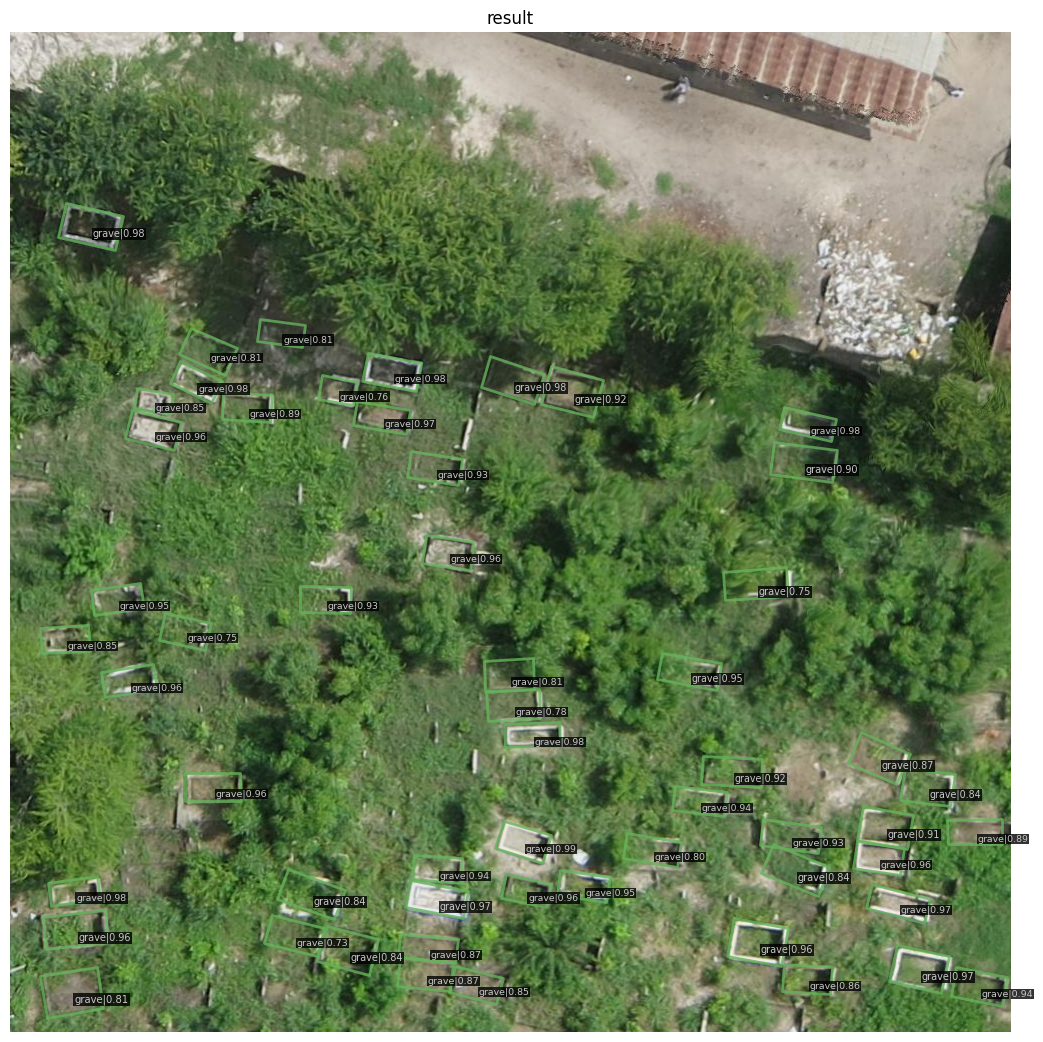

In [17]:
from mmdet.apis import inference_detector, show_result_pyplot
img = mmcv.imread('/gpfs/home/weitzk01/drone_data/images/Karume Cemetery_SatelliteImagery_drone_556f7a4bac00a903002fb2a2.tif_0_1.png')
model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.7)

In [18]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir ./tutorial_exps

Reusing TensorBoard on port 6006 (pid 999717), started 0:20:01 ago. (Use '!kill 999717' to kill it.)